In [1]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm_drop.xlsx")



In [2]:
data_main


,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,0.000000,0.000000,0.461877
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,0.035381,0.020055,0.260330
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [3]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,NaN,NaN,NaN
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,NaN,NaN,NaN
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [4]:
print(data.isnull().sum())
data.drop(columns="Unnamed: 0",inplace=True)
data_main.drop(columns="Unnamed: 0",inplace=True)

Unnamed: 0          0
FORCE_B(Right)     82
FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64


In [5]:
data.shape

(601, 3)

In [6]:
print((82/601)*100)


13.643926788685523


FORCE_B(Right)


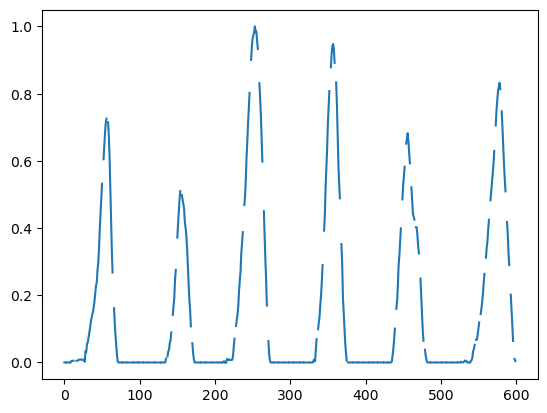

FORCE_C(Left),


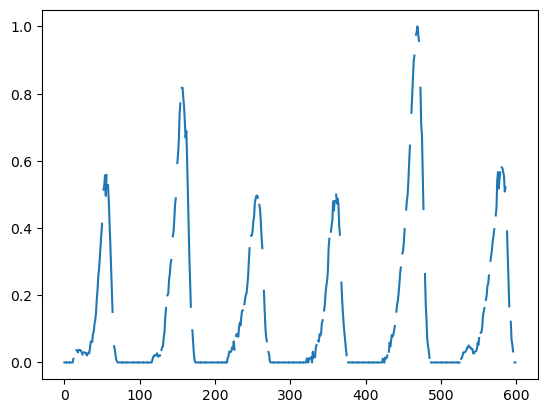

Force_C(Left).1


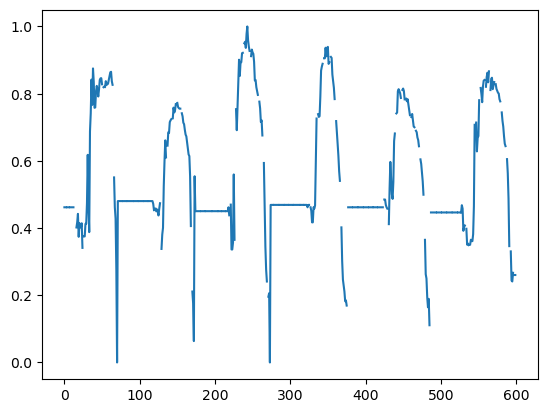

In [7]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [8]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : Force_C(Left).1

In [9]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target.xlsx")





In [10]:
data2.columns

Index(['Unnamed: 0', 'Force_B(Right)', 'Force_C(Left)', 'Force_C(Left).1'], dtype='object')

In [11]:

L2=data2.loc[:,['Force_C(Left)','Force_C(Left).1']]

scaler=MinMaxScaler()
L_scaled=scaler.fit_transform(L2)

In [12]:
data2=pd.DataFrame(data=L_scaled)


In [13]:
data2=data2.set_axis(["Force_C(Left)","Force_C(Left).1"],axis="columns")

In [14]:
data2

,Force_C(Left),Force_C(Left).1
0,0.000000,0.461877
1,0.000000,0.461877
2,0.000000,0.461877
3,0.000000,0.461877
4,0.000000,0.461877
...,...,...
596,0.032817,0.266862
597,0.020055,0.260330
598,0.000000,0.260330
599,0.000000,0.260330


In [15]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','Force_C(Left).1']]

<Axes: >

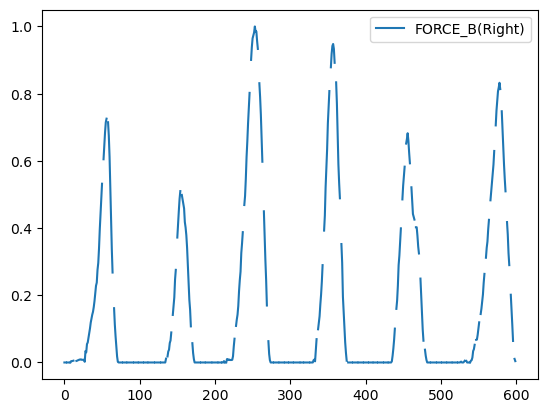

In [16]:
R.plot()

<Axes: >

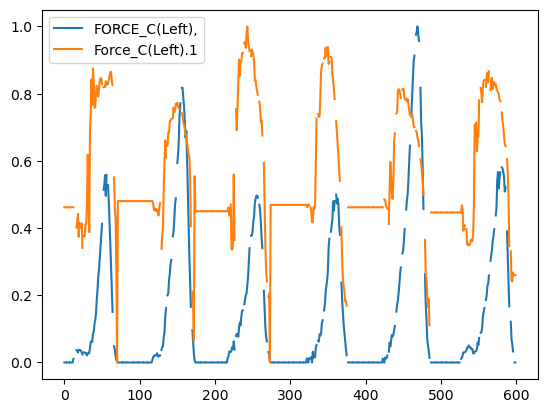

In [17]:
L.plot()

In [18]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)


In [19]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FORCE1_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FORECE1_C=np.setdiff1d(index,loss_index_L_FORCE1_C)

In [20]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [21]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

y_train_L_FORECE1_C=L.iloc[normal_index_L_FORECE_C,1]
x_test_L_FORECE1_C=loss_index_L_FORCE1_C

L_FORCE_C=L.iloc[:,0].copy()
L_FORCE1_C=L.iloc[:,1].copy()

In [22]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(519, 1)
(519,)


In [44]:
from xgboost import XGBRegressor


In [45]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(519, 1)
(519,)


In [46]:
data_main.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'Force_C(Left).1'], dtype='object')

In [23]:
import numpy as np
import optuna
from keras.applications import MobileNet
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


def objective(trial):
    
    #epochs=trial.suggest_int("epochs",1000,5000)
    n_estimators = trial.suggest_int("n_estimators",200,1000)
    learning_rate = trial.suggest_float("learning_rate",0.1,1.0)
    max_depth = trial.suggest_int("max_depth",1,10)
    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C)
    y_pred = model.predict(x_test_L_FORECE_C)
    
    c=0
    for i in loss_index_L_FORECE_C:    
        L_FORCE_C[i]=y_pred[c]
        c+=1
    return mean_squared_error(data_main['FORCE_C(Left),'], L_FORCE_C) ** 0.5

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

best_params=study.best_params
print(best_params)
study.best_value

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-14 18:12:45,828] A new study created in memory with name: no-name-e381149e-e1d0-439f-9e33-579151d76cd0
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
[I 2023-11-14 18:12:45,910] Trial 0 finished with value: 0.010323762880080786 and parameters: {'n_estimators': 349, 'learning_rate': 0.8705808574767336, 'max_depth': 4}. Best is trial 0 with value: 0.010323762880080786.
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a f

{'n_estimators': 246, 'learning_rate': 0.370348928383778, 'max_depth': 2}


0.009427042052327424

In [24]:
import numpy as np
import optuna
from keras.applications import MobileNet
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


def objective(trial):
    
    #epochs=trial.suggest_int("epochs",1000,5000)
    n_estimators = trial.suggest_int("n_estimators",200,1000)
    learning_rate = trial.suggest_float("learning_rate",0.1,1.0)
    max_depth = trial.suggest_int("max_depth",1,10)
    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    model.fit(x_train_R_FORECE_B,y_train_L_FORECE1_C)
    y_pred = model.predict(x_test_L_FORECE1_C)
    
    c=0
    for i in loss_index_L_FORECE_C:    
        L_FORCE1_C[i]=y_pred[c]
        c+=1
    return mean_squared_error(data_main['Force_C(Left).1'],L_FORCE1_C) ** 0.5

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

best_params=study.best_params
print(best_params)
study.best_value

[I 2023-11-14 18:16:18,781] A new study created in memory with name: no-name-028a770c-ba51-4885-8f32-aa1406f8896a
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
[I 2023-11-14 18:16:18,908] Trial 0 finished with value: 0.016888947965637773 and parameters: {'n_estimators': 850, 'learning_rate': 0.4272924734233489, 'max_depth': 7}. Best is trial 0 with value: 0.016888947965637773.
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
[I 2023-11-14 18:16:19,014] Trial 1 finished with value: 0.016813661559830304 and parameters: {'n_estimators': 696, 'learning_rate': 0.34112858530948675, 'max_depth': 9}. Best is trial

{'n_estimators': 235, 'learning_rate': 0.1313228888605187, 'max_depth': 2}


0.01501433781892224

In [27]:
model = XGBRegressor(n_estimators=338, learning_rate=0.10128617494256387, max_depth=2)
model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C)
y_pred = model.predict(x_test_L_FORECE_C)
    
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=y_pred[c]
    c+=1


    


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [745]:
#Best is trial 558 with value: 0.00943636272518866.
#{'n_estimators': 338, 'learning_rate': 0.10128617494256387, 'max_depth': 2}

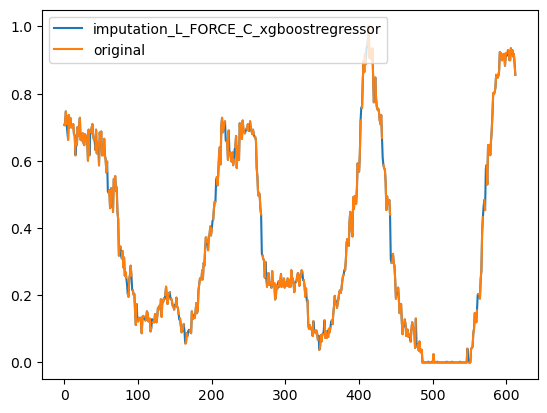

In [28]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_xgboostregressor')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [29]:
model = XGBRegressor(n_estimators=338, learning_rate=0.10128617494256387, max_depth=2)
model.fit(x_train_R_FORECE_B,y_train_L_FSR_C)
y_pred = model.predict(x_test_L_FSR_C)

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


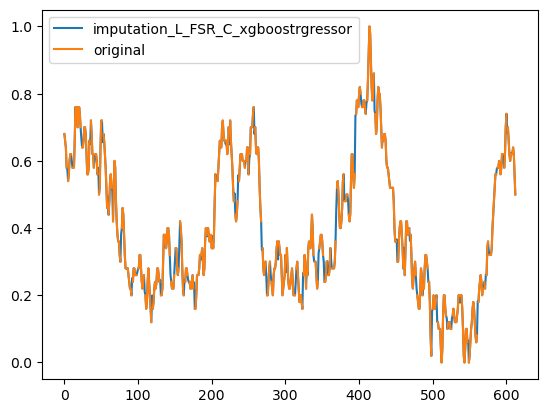

In [31]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=y_pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_L_FSR_C_xgboostrgressor')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [32]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['FSR DATA_C(Left)'],L_FSR_C))

0.00943636272518866
0.016507911471805598


In [33]:
L.isnull().sum()


FORCE_C(Left),      78
FSR DATA_C(Left)    78
dtype: int64

In [34]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

<Axes: >

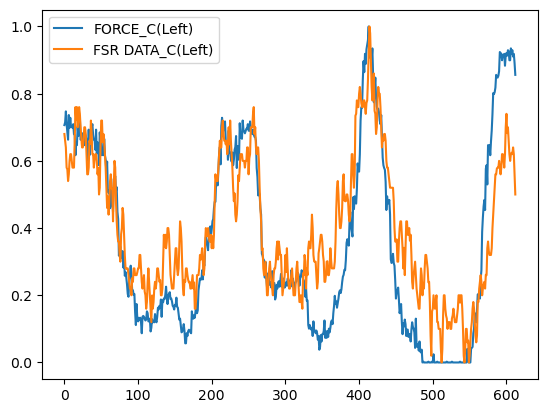

In [35]:
L=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L.plot()

<Axes: >

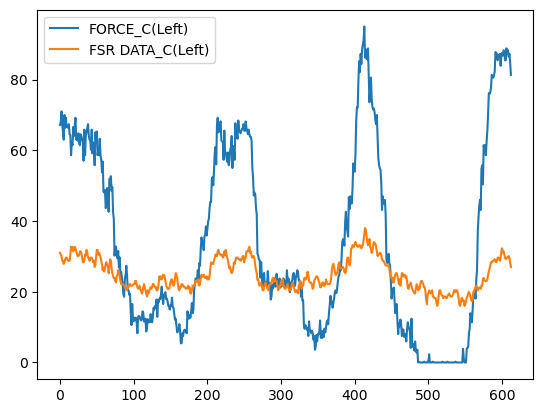

In [36]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot()